# Guia 3

## Ejercicio 3

Calcule el error cuadrático total de aproximación en el ejemplo con funciones de Legendre bajo las siguientes condiciones:
1. con los coeficientes calculados en el ejemplo,
2. con pequeñas variaciones en torno a estos coeficientes $\alpha$, construyendo una gráfica en 3D con la variación en los coeficientes en $x$, $y$ y el error cuadrático total en $z$,
3. con más coeficientes $\alpha$, para comprobar cómo se reduce el error cuadrático total al aumentar los coeficientes.

### Error cuadrático total

El _error cuadrático total_ se define como
$$
    \epsilon = ||e||^2_2 = ||y-\~{y}||^2_2
$$

### Solución 3-1

Para aproximar las función $y(t)$ vamos a usar las funciones de Legendre, ortonormales en el intervalo $[-1,1]$
$$
y(t) = 
    \begin{cases}
        -1  &\quad \forall t < 0\\
        1   &\quad \forall t >= 0 \\
    \end{cases}
$$
La n-esima función de Legendre tiene la forma
$$
\phi_n (t) = \sqrt{\frac{2n+1}{2}} \frac{1}{2^n n!} \frac{d^n}{dt^n} (t^2-1)^n
$$
Calculando los coeficientes para aproximar $y(t)$ con las primeras 4 funciones de Legendre, obtenemos
$$
\begin{align*}
    \alpha_0 &= <y,\phi_0> = \int_{-1}^{1} \sqrt{\frac{1}{2}}y(t)dt=0\\
    \alpha_1 &= <y,\phi_1> = \int_{-1}^{1} \sqrt{\frac{3}{2}}ty(t)dt = \sqrt{\frac{3}{2}}\\
    \alpha_2 &= <y,\phi_2> = \int_{-1}^{1} \sqrt{\frac{5}{2}}\left( \frac{3}{2}t^2 - \frac{1}{2} \right)y(t)dt = 0\\
    \alpha_3 &= <y,\phi_3> = \int_{-1}^{1} \sqrt{\frac{7}{2}}\left( \frac{5}{2}t^3 - \frac{3}{2}t \right)y(t)dt = - \sqrt{\frac{7}{32}}
\end{align*}
$$
Por lo que podemos aproximar $y(t)$ como
$$
\begin{align*}
    y(t) &\approx <y,\phi_1> \phi_1(t) + - <y,\phi_3> \phi_3(t)\\
         &= \sqrt{\frac{3}{2}} \left( \sqrt{\frac{3}{2}}t \right) + \left( -\sqrt{\frac{7}{32}} \right) \left( \sqrt{\frac{7}{2}} \left( \frac{5}{2}t^3 -\frac{3}{2}t \right) \right)\\
         &= \frac{45}{16}t - \frac{35}{16}t^3
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def norma2(x):
    """Norma 2"""
    return np.sqrt(np.sum(np.power(x,[2]*len(x))))

def ECT(y,yapprox):
    """
        Error cuadratico total entre y y su aproximacion.\\
        Se define como la norma 2 al cuadrado de la diferencia de las seniales, pero por optimizacion y para evitar error de redondeo lo hacemos directamente como la suma de los cuadrados de la diferencia
    """
    if(len(y) != len(yapprox)):
        raise Exception("las seniales no tienen el mismo tamanio")

    return np.sum(np.power(y-yapprox,[2]*len(y)))

def yreal(t):
    """funcion real y(t) donde t<0 => y(t)=-1, si no y(t)=1"""
    return np.where(np.less(t,[0]*len(t)),-1,1)

def yapprox(t):
    """funcion aproximante de y con los primeros cuatro polinomios de Legendre"""
    frac1 = 45.0/16.0
    frac2 = 35.0/16.0
    return frac1*t - frac2*np.power(t,[3]*len(t))

Prueba

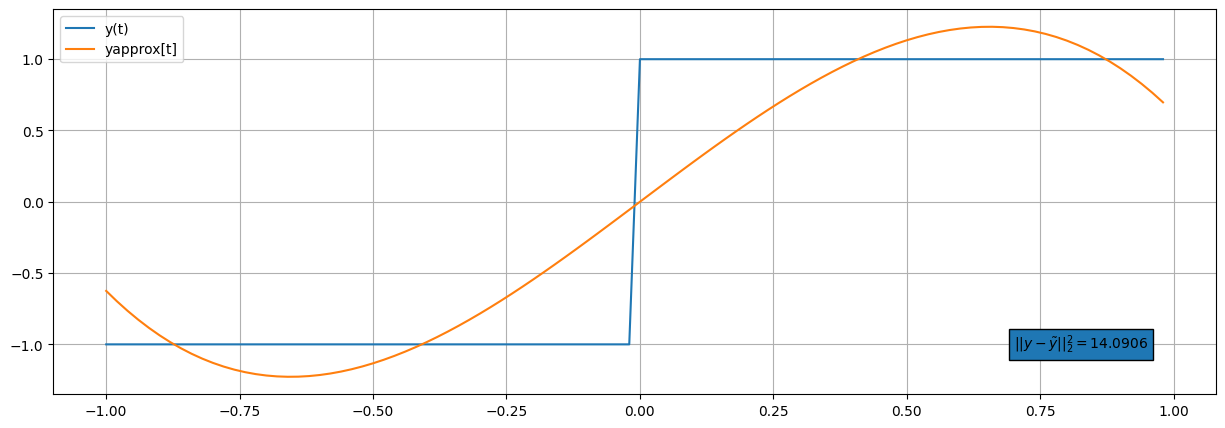

In [2]:
# Parametros
Tini = -1
Tfin = 1
fm = 50

# Calculo
t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)), endpoint=False)
s = [yreal(t), yapprox(t)]

# Graficar
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(15)

ax.grid()
ax.plot(t,s[0],label="y(t)")
ax.plot(t,s[1],label="yapprox[t]")
ax.text(0.7,-1, "$ ||y - \\~{y} ||^2_2 = %.4f $ " % ECT(s[0],s[1]), fontsize=10, va='center',
        bbox=dict(boxstyle='square'))
ax.legend()

plt.show()